In [4]:
import pandas as pd
import numpy as np


In [5]:
!pip install hmmlearn

  Obtaining dependency information for hmmlearn from https://files.pythonhosted.org/packages/6b/62/0c7b618eac6f27220baecdfe476259e005c690bf825d02a3cb8e5470bf2c/hmmlearn-0.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 119.1 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/125.4 kB 302.7 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/125.4 kB 302.7 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/125.4 kB 302.7 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/125.4 kB 302.7 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 307.0 kB/s eta 0:00:00


In [6]:
from hmmlearn import hmm

In [8]:
df = pd.read_csv(r"D:\Mages\csv files\archive\associatedpress-johns-hopkins-coronavirus-case-tracker\1_county_level_confirmed_cases.csv")

In [9]:
df

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-08-15 23:27:16 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,1206,2184.78,22,39.86
1,2020-08-15 23:27:16 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,3839,1844.72,29,13.94
2,2020-08-15 23:27:16 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,598,2319.45,6,23.27
3,2020-08-15 23:27:16 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,469,2081.95,5,22.20
4,2020-08-15 23:27:16 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,854,1481.48,5,8.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,2020-08-15 23:27:16 UTC,special_exception,Utah,Central Utah,"Central Utah, Utah, US",NaN,39.372319,-111.575868,NaN,NaN,447,NaN,3,NaN
3251,2020-08-15 23:27:16 UTC,special_exception,Utah,Southeast Utah,"Southeast Utah, Utah, US",NaN,38.996171,-110.701396,NaN,NaN,117,NaN,1,NaN
3252,2020-08-15 23:27:16 UTC,special_exception,Utah,Southwest Utah,"Southwest Utah, Utah, US",NaN,37.854472,-111.441876,NaN,NaN,3312,NaN,26,NaN
3253,2020-08-15 23:27:16 UTC,special_exception,Utah,TriCounty,"TriCounty, Utah, US",NaN,40.124915,-109.517442,NaN,NaN,190,NaN,0,NaN


In [13]:
print(df.columns)

Index(['last_update', 'location_type', 'state', 'county_name',
       'county_name_long', 'fips_code', 'lat', 'lon', 'NCHS_urbanization',
       'total_population', 'confirmed', 'confirmed_per_100000', 'deaths',
       'deaths_per_100000'],
      dtype='object')


In [14]:
df['last_update'] = pd.to_datetime(df['last_update'], format='%Y-%m-%d %H:%M:%S %Z')

In [15]:
#sorting the df by dates  😒

In [16]:
df.sort_values('last_update', inplace=True)

In [17]:
df

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
3191,2020-08-07 22:34:20+00:00,out_of_state,Maine,Out of ME,"Out of ME, Maine, US",80023.0,NaN,NaN,NaN,NaN,0,NaN,0,NaN
2164,2020-08-15 23:27:16+00:00,county,Oklahoma,McIntosh,"McIntosh, Oklahoma, US",40091.0,35.372355,-95.665993,Non-core,19819.0,205,1034.36,2,10.09
2165,2020-08-15 23:27:16+00:00,county,Oklahoma,Murray,"Murray, Oklahoma, US",40099.0,34.481160,-97.068263,Non-core,13875.0,79,569.37,0,0.00
2166,2020-08-15 23:27:16+00:00,county,Oklahoma,Muskogee,"Muskogee, Oklahoma, US",40101.0,35.613185,-95.378030,Micropolitan,69084.0,572,827.98,16,23.16
2167,2020-08-15 23:27:16+00:00,county,Oklahoma,Noble,"Noble, Oklahoma, US",40103.0,36.389533,-97.229287,Non-core,11411.0,91,797.48,2,17.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,2020-08-15 23:27:16+00:00,county,Kentucky,Rowan,"Rowan, Kentucky, US",21205.0,38.194842,-83.420889,Non-core,24499.0,88,359.20,0,0.00
1089,2020-08-15 23:27:16+00:00,county,Kentucky,Russell,"Russell, Kentucky, US",21207.0,36.993084,-85.060701,Non-core,17760.0,139,782.66,5,28.15
1090,2020-08-15 23:27:16+00:00,county,Kentucky,Scott,"Scott, Kentucky, US",21209.0,38.296223,-84.581663,Medium metro,53517.0,426,796.01,0,0.00
1080,2020-08-15 23:27:16+00:00,county,Kentucky,Owsley,"Owsley, Kentucky, US",21189.0,37.428239,-83.688114,Non-core,4463.0,15,336.10,0,0.00


In [18]:
#checking for missing values and "handling them"

In [19]:
df.fillna(method='ffill', inplace=True)

In [20]:
df

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
3191,2020-08-07 22:34:20+00:00,out_of_state,Maine,Out of ME,"Out of ME, Maine, US",80023.0,NaN,NaN,NaN,NaN,0,NaN,0,NaN
2164,2020-08-15 23:27:16+00:00,county,Oklahoma,McIntosh,"McIntosh, Oklahoma, US",40091.0,35.372355,-95.665993,Non-core,19819.0,205,1034.36,2,10.09
2165,2020-08-15 23:27:16+00:00,county,Oklahoma,Murray,"Murray, Oklahoma, US",40099.0,34.481160,-97.068263,Non-core,13875.0,79,569.37,0,0.00
2166,2020-08-15 23:27:16+00:00,county,Oklahoma,Muskogee,"Muskogee, Oklahoma, US",40101.0,35.613185,-95.378030,Micropolitan,69084.0,572,827.98,16,23.16
2167,2020-08-15 23:27:16+00:00,county,Oklahoma,Noble,"Noble, Oklahoma, US",40103.0,36.389533,-97.229287,Non-core,11411.0,91,797.48,2,17.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,2020-08-15 23:27:16+00:00,county,Kentucky,Rowan,"Rowan, Kentucky, US",21205.0,38.194842,-83.420889,Non-core,24499.0,88,359.20,0,0.00
1089,2020-08-15 23:27:16+00:00,county,Kentucky,Russell,"Russell, Kentucky, US",21207.0,36.993084,-85.060701,Non-core,17760.0,139,782.66,5,28.15
1090,2020-08-15 23:27:16+00:00,county,Kentucky,Scott,"Scott, Kentucky, US",21209.0,38.296223,-84.581663,Medium metro,53517.0,426,796.01,0,0.00
1080,2020-08-15 23:27:16+00:00,county,Kentucky,Owsley,"Owsley, Kentucky, US",21189.0,37.428239,-83.688114,Non-core,4463.0,15,336.10,0,0.00


In [22]:
#feature selection date population and confirmed cases

In [25]:
selected_columns = ['last_update','total_population', 'confirmed']

df = df[selected_columns]

In [29]:
df

,last_update,total_population,confirmed,Cases_per_capita
3191,2020-08-07 22:34:20+00:00,NaN,0,NaN
2164,2020-08-15 23:27:16+00:00,19819.0,205,0.010344
2165,2020-08-15 23:27:16+00:00,13875.0,79,0.005694
2166,2020-08-15 23:27:16+00:00,69084.0,572,0.008280
2167,2020-08-15 23:27:16+00:00,11411.0,91,0.007975
...,...,...,...,...
1088,2020-08-15 23:27:16+00:00,24499.0,88,0.003592
1089,2020-08-15 23:27:16+00:00,17760.0,139,0.007827
1090,2020-08-15 23:27:16+00:00,53517.0,426,0.007960
1080,2020-08-15 23:27:16+00:00,4463.0,15,0.003361


In [ ]:
#These cells are for cases reported per capita

In [27]:
df['Cases_per_capita'] = df['confirmed']/df['total_population']

In [28]:
df['Cases_per_capita']

3191         NaN
2164    0.010344
2165    0.005694
2166    0.008280
2167    0.007975
          ...   
1088    0.003592
1089    0.007827
1090    0.007960
1080    0.003361
3254    0.665696
Name: Cases_per_capita, Length: 3255, dtype: float64

In [30]:
#about to save the data to a new csv file

In [35]:
df.to_csv('D:/Mages/csv files/Preprocessed_Covid_data.csv', index=False)


In [49]:
#Loading the preprocessed data

In [50]:
df = pd.read_csv(r"D:\Mages\csv files\Preprocessed_Covid_data.csv")

In [51]:
#Extracting daily new cases

In [58]:
import numpy as np

observations = np.abs(df["confirmed"].diff().fillna(0).astype(int))

# Ensure all values are nonnegative
if (observations < 0).any():
    raise ValueError("Observations contain negative values")

# Reshape if necessary (if observations is 1D)
observations = observations.values.reshape(-1, 1)




In [36]:
#time to define about three hidden states 😒

In [38]:
n_states = 3

model = hmm.MultinomialHMM(n_components=n_states, n_iter=100)

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


In [39]:
#fix that later😁

In [40]:
#The chains. Initializing transition probabilities

In [43]:
transition_matrix = [[0.7, 0.2, 0.1], [0.1,0.7,0.2], [0.1,0.2,0.7]]

model.transmat_=transition_matrix

In [42]:
#all are probabilities after all

In [44]:
#Initializing the emission probabilities

In [45]:
emission_matrix = [[0.8,0.1,0.1], [0.1,0.7,0.2], [0.1,0.2,0.7]]

model.emissionprob_ = emission_matrix

In [46]:
#fitting the model to the observed data

In [59]:
model.fit(observations)

Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


MultinomialHMM(n_components=3, n_iter=100,
               n_trials=array([   0,  205,  126, ...,  287,  411, 2956]),
               random_state=RandomState(MT19937) at 0x18212841140)

In [62]:
predicted_states = model.predict(observations)

In [63]:
print("Predicted States (0: Exposed, 1: Infected, 2: Deceased):")
print(predicted_states)

Predicted States (0: Exposed, 1: Infected, 2: Deceased):
[1 2 0 ... 0 0 0]


In [64]:
#Let's try some visualisations

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='total_population', ylabel='confirmed'>

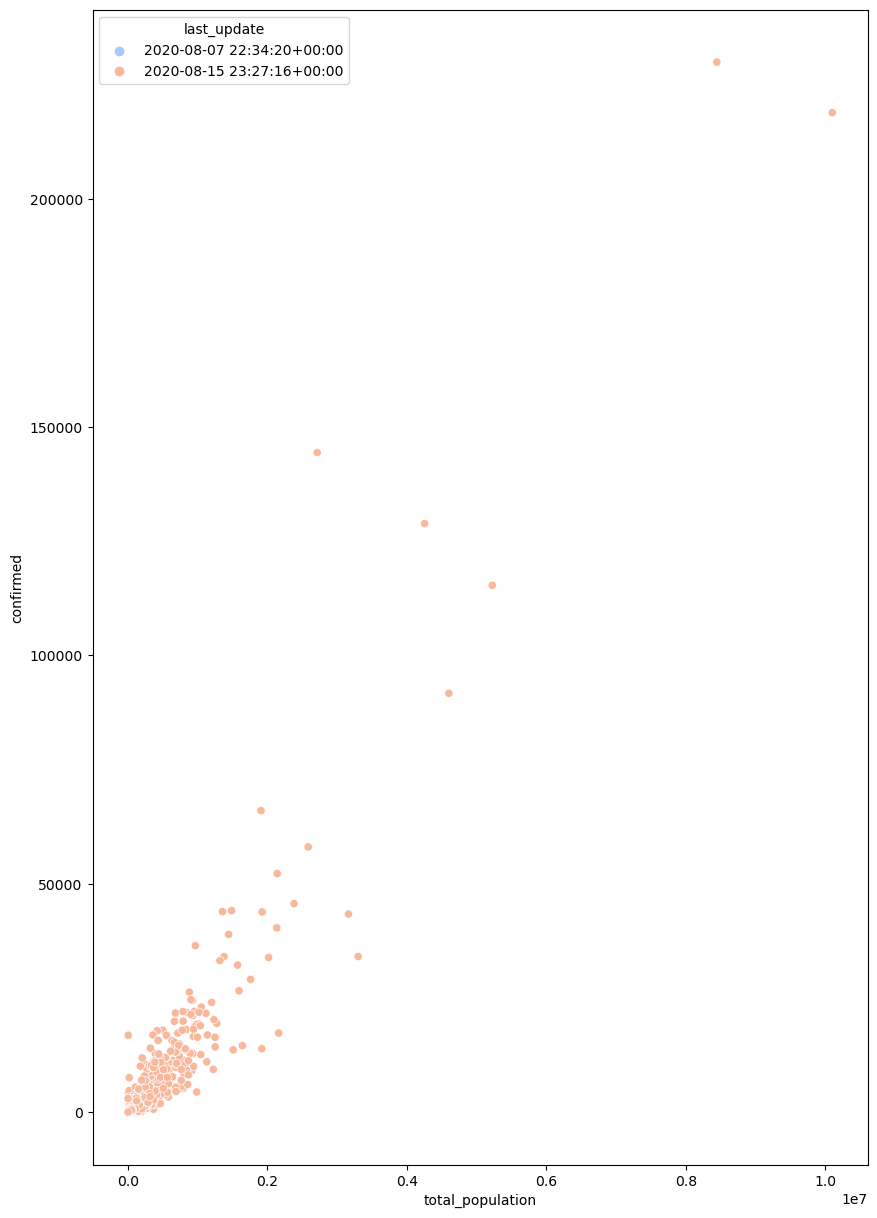

In [97]:
plt.figure(figsize = (10,15))

sns.scatterplot(x = 'total_population', y = 'confirmed', hue = 'last_update', data = df, palette = "coolwarm" )


In [75]:
df

,last_update,total_population,confirmed,Cases_per_capita
0,2020-08-07 22:34:20+00:00,NaN,0,NaN
1,2020-08-15 23:27:16+00:00,19819.0,205,0.010344
2,2020-08-15 23:27:16+00:00,13875.0,79,0.005694
3,2020-08-15 23:27:16+00:00,69084.0,572,0.008280
4,2020-08-15 23:27:16+00:00,11411.0,91,0.007975
...,...,...,...,...
3250,2020-08-15 23:27:16+00:00,24499.0,88,0.003592
3251,2020-08-15 23:27:16+00:00,17760.0,139,0.007827
3252,2020-08-15 23:27:16+00:00,53517.0,426,0.007960
3253,2020-08-15 23:27:16+00:00,4463.0,15,0.003361
